In [160]:
#Pushshift API Documentation : https://reddit-api.readthedocs.io/en/latest/

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import csv
from copy import deepcopy as deepcopy

import string
import contractions
import demoji

import pmaw
import praw

#Reddit Key
import constants
reddit = praw.Reddit(
client_id = constants.reddit_client_id,
client_secret = constants.reddit_client_secret,
user_agent=constants.reddit_user_agent
)

In [162]:
#Creating a pushshift API sub instance
from pmaw import PushshiftAPI
api = PushshiftAPI()

In [16]:
#Getting comments from PMAW directly
#comments = api.search_comments(subreddit="bitcoin", limit=1000)
#Getting the Comment created time, Author and COmment body from the generator object.
#comment_list_exp = [[comment['created_utc'],comment['author'],comment['body']] for comment in comments]


In [163]:
def get_comments(topic,start_time,end_time):
    
    comments_list = []
    api_praw = PushshiftAPI(praw=reddit)
    comments = api_praw.search_comments(q=topic, limit=1000, after=int(start_time), before=int(end_time))
    
    #Getting the Comment created time, Author and Comment body from the generator object.
    comment_list_exp = [[comment['created_utc'],comment['author'],comment['body']] for comment in comments]
        
    #Writing comments to CSV File
    file_name = topic+'_'+str(start_time)+'_'+str(end_time)+'.csv'
    header = ['Sub_Time','Author','Comments']

    try:
        f = open(file_name, 'w',encoding='UTF8',newline='')
        writer = csv.writer(f)
        writer.writerow(header)
        for comment in comment_list_exp:
            writer.writerow(comment)
            #Creating the data frame with comments here for now. Before publishing, can skip
            #saving to a file and only create a list with comments and then a data frame.
            comments_list.append(comment[2])
        f.close()
    except:
        f.close()
    
    return(pd.DataFrame(comments_list,columns=['comments']))
    

In [179]:
df = get_comments("bitcoin",1638401787,1669937787)

In [99]:
#Saving Data for future use
df.head()
df_pkl = df.to_pickle("./df_reddit.pkl")

In [125]:
df = pd.read_pickle("./df_reddit.pkl")

In [180]:
df.head()

,comments
0,Just a reminder of the [rules](https://www.red...
1,For me I try to think of it at a very simple f...
2,Crypto is actually harder to launder than pape...
3,One more: \n\nThe world was a changed place. T...
4,Nobody has time to fact check all incorrect or...


In [181]:
#Removing Web links
df['comments'] = df.comments.apply(lambda x:re.sub(r"http\S+", "",x))

In [182]:
#Fixing contractions like i'd
df['comments'] = df.comments.apply(lambda x:contractions.fix(x))

In [183]:
#Lowercasing all the comments
df['comments'] = df.comments.apply(lambda x:str(x).lower())

In [184]:
df.head(5)

,comments
0,just a reminder of the [rules]( of the sub.\n\...
1,for me i try to think of it at a very simple f...
2,crypto is actually harder to launder than pape...
3,one more: \n\nthe world was a changed place. t...
4,nobody has time to fact check all incorrect or...


In [185]:
#Removing Punctuations
punc_to_remove = string.punctuation+'\n'
replace_punc = str.maketrans('','',punc_to_remove)
df['comments'] = df.comments.apply(lambda x: x.translate(replace_punc))
df.head(5)

,comments
0,just a reminder of the rules of the subif you ...
1,for me i try to think of it at a very simple f...
2,crypto is actually harder to launder than pape...
3,one more the world was a changed place the eff...
4,nobody has time to fact check all incorrect or...


In [186]:
df.tail(10)

,comments
990,the easiest way for me is when people asking i...
991,e as proven by literally hundreds if not even ...
992,bruh you realize this talking point has been ...
993,bitcoin dips under 17000 bitcoin reclaims 1700...
994,tldr coinbase wallet will end support for seve...
995,може да се измисли система за независим контро...
996,he did steal it he stole all the real money ex...
997,deleted
998,hi there i am savanna or anna 💜 i am an asian ...
999,buying bitcoin is not saving it is the opposit...


In [187]:
def replace_digits(x):
    y = ''
    for i in x:
        if i.isdigit():
            continue
        else:
            y = y+i
    return y

In [188]:
#Removing Numbers
df['comments'] = df.comments.apply(replace_digits)
df.tail(10)

,comments
990,the easiest way for me is when people asking i...
991,e as proven by literally hundreds if not even ...
992,bruh you realize this talking point has been ...
993,bitcoin dips under bitcoin reclaims bitcoin ...
994,tldr coinbase wallet will end support for seve...
995,може да се измисли система за независим контро...
996,he did steal it he stole all the real money ex...
997,deleted
998,hi there i am savanna or anna 💜 i am an asian ...
999,buying bitcoin is not saving it is the opposit...


In [189]:
#Removing Extra Spaces
df['comments'] = df.comments.apply(lambda x:" ".join(x.split()))

In [190]:
df.head()

,comments
0,just a reminder of the rules of the subif you ...
1,for me i try to think of it at a very simple f...
2,crypto is actually harder to launder than pape...
3,one more the world was a changed place the eff...
4,nobody has time to fact check all incorrect or...


In [86]:
#Removing EMojis
#emoji_pattern = re.compile("["
#                        u"U0001F600-U0001F64F"  # emoticons
#                        u"U0001F300-U0001F5FF"  # symbols & pictographs
#                        u"U0001F680-U0001F6FF"  # transport & map symbols
#                        u"U0001F1E0-U0001F1FF"  # flags (iOS)
#                        u"U00002702-U000027B0"
#                        u"U000024C2-U0001F251"
#                        "]+", flags=re.UNICODE)

#df['comments'] = df.comments.apply(lambda x: emoji_pattern.sub(r'', x))

In [191]:
#Removing Emoticons
EMOTICONS = {
u":‑)":"Happy face or smiley",
u":)":"Happy face or smiley",
u":-]":"Happy face or smiey",
u":]":"Happy face or smiley",
u":-3":"Happy face smiley",
u":3":"Happy face smiley",
u":->":"Happy face smiley",
u":>":"Happy face smiley",
u"8-)":"Happy face smiley",
u":o)":"Happy face smiley",
u":-}":"Happy face smiley",
u":}":"Happy face smiley",
u":-)":"Happy face smiley",
u":c)":"Happy face smiley",
u":^)":"Happy face smiley",
u"=]":"Happy face smiley",
u":(":"Sad face smiley"
}

In [192]:
#Replacing EMoticons with respective text
def convert_emoticons(text):
    for emot in EMOTICONS:
        text = re.sub(u'('+emot+')', "_".join(EMOTICONS[emot].replace(",","").split()), text)
    return text

In [88]:
#Saving Processed Pickle File
df.to_pickle("./df_reddit_cleaned.pkl")

In [193]:
df.describe()

,comments
count,1000
unique,93
top,deleted
freq,60


In [207]:
df = df.drop_duplicates()

In [208]:
df.describe()

,comments
count,93
unique,93
top,just a reminder of the rules of the subif you ...
freq,1


In [209]:
df.head()

,comments
0,just a reminder of the rules of the subif you ...
1,for me i try to think of it at a very simple f...
2,crypto is actually harder to launder than pape...
3,one more the world was a changed place the eff...
4,nobody has time to fact check all incorrect or...


In [97]:
df.to_csv("./bitcoin_1638401787_1669937787_cleaned.csv")

In [210]:
df['comments'].isnull().value_counts()

False    93
Name: comments, dtype: int64

In [102]:
freq = pd.Series(' '.join(df_dupdrop['comments']).split()).value_counts()
less_freq = list(freq[freq ==1].index)
less_freq

['stress',
 'venezuela',
 'theory',
 'suffering',
 'revolution',
 'technical',
 'led',
 'iran',
 'fund',
 'логове',
 'instability',
 'comprehensive',
 'hear',
 'congested',
 'slowly',
 'криптовалутата',
 'reserve',
 'web',
 'на',
 'funny',
 'awfully',
 'гласуват',
 'което',
 'funded',
 'drug',
 'stability',
 'идва',
 'oversight',
 'reasonable',
 'tax',
 'flat',
 'actors',
 'speculative',
 'holdings',
 'съответните',
 'straight',
 'проблемиhttpsmoneycnncomtechnologybusinessbitcoincashnewcurrencyindexhtml',
 'anarco',
 'care',
 'libertariano',
 'self',
 'capitalist',
 'far',
 'stole',
 'illegal',
 'помежду',
 'cartels',
 'courts',
 'taxation',
 'paymentall',
 'resolved',
 'switching',
 'код',
 'speculation',
 'който',
 'някоиси',
 'three',
 'sole',
 'твърди',
 'някакъвси',
 'recent',
 'suggests',
 'нещоси',
 'title',
 'strong',
 'accuracy',
 'liquid',
 'nearly',
 'mandatory',
 'какво',
 'boy',
 'е',
 'случило',
 'те',
 'talked',
 'въпросът',
 'tackled',
 'гледаш',
 'aspect',
 'cointests'

In [198]:
def replace_emoji(str1):
    return demoji.replace_with_desc(str1, " ")

In [211]:
#Replacing Emojis with their text
df['comments'] = df['comments'].apply(replace_emoji)

In [212]:
#Remove non ASCII Letters
df['comments'] = df.comments.apply(lambda x: x.encode("ascii", errors="ignore").decode())

In [213]:
df.tail(10)

,comments
89,buy bitcoin and relax either you get rekd and ...
90,the easiest way for me is when people asking i...
91,e as proven by literally hundreds if not even ...
92,bruh you realize this talking point has been s...
93,bitcoin dips under bitcoin reclaims bitcoin dr...
94,tldr coinbase wallet will end support for seve...
95,...
96,he did steal it he stole all the real money ex...
98,hi there i am savanna or anna purple heart i...
99,buying bitcoin is not saving it is the opposit...


In [214]:
#Remove any Null rows
df['comments'].isnull().value_counts()

False    93
Name: comments, dtype: int64

In [215]:
#Finding Frequency of words
freq = pd.Series(' '.join(df['comments']).split()).value_counts()
freq

the         474
to          411
is          334
and         319
of          276
           ... 
damms         1
makers        1
dynamic       1
supports      1
pissed        1
Length: 2569, dtype: int64

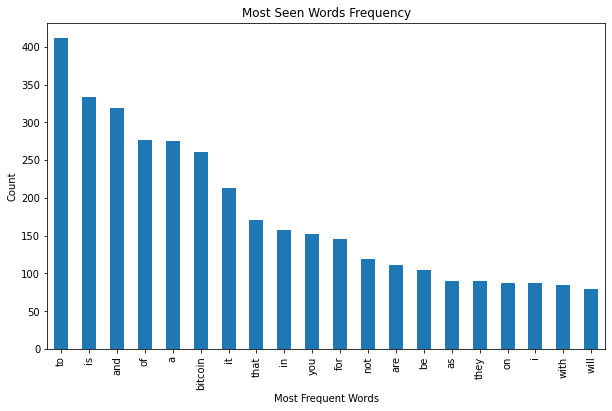

In [216]:
freq[1:21].plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Most Frequent Words",
    ylabel = "Count",
    title = "Most Seen Words Frequency"
)
plt.show()

In [220]:
#Remove stop words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['comments'] = df.comments.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['comments'].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    reminder rules subif get responses try differe...
1    try think simple fundamental level currencies ...
2    crypto actually harder launder paper money tra...
3    one world changed place effects climate change...
4    nobody time fact check incorrect misleading in...
Name: comments, dtype: object

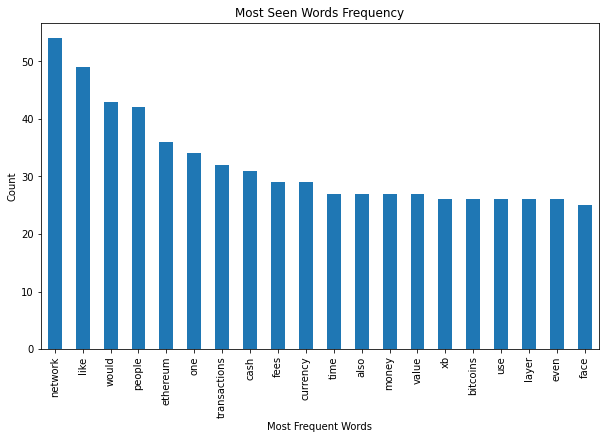

In [221]:
#Plotting after removing the stop words
freq = pd.Series(' '.join(df['comments']).split()).value_counts()
freq[1:21].plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Most Frequent Words",
    ylabel = "Count",
    title = "Most Seen Words Frequency"
)
plt.show()

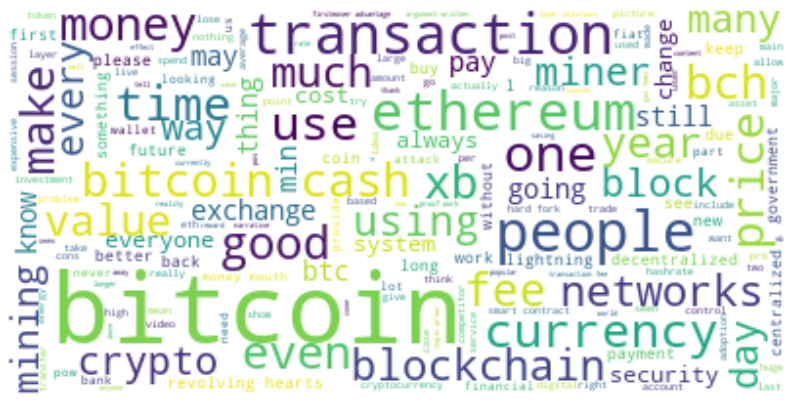

In [225]:
#Plotting word cloud to see the frequent words
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stop_words = set(STOPWORDS)
stop_words = stop_words.union(["network", "would", "also", "face"])
text = " ".join(comment for comment in df.comments)
wordcl = WordCloud( stopwords = stop_words, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [104]:
#Alternatively using Cleantext module to clean the data
df2 = pd.read_pickle("./df_reddit.pkl")

In [106]:
from cleantext import clean

In [107]:
df2['comments'] = df2.comments.apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [108]:
df2.head()
#Cleaning through clean text doesnt seem to be very accurate.

,comments
0,remind ruleshttpswwwredditcomrdrawmensfwwikiru...
1,tri think simpl fundament level currenc centra...
2,crypto actual harder launder paper money trans...
3,one world chang place effect climat chang ever...
4,nobodi time fact check incorrect mislead infor...
